### Min Max Scaling

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day25-normalization/wine_data.csv',header=None,usecols=[0,1,2])
df.columns=['Class label', 'Alcohol', 'Malic acid']

In [ ]:
df

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


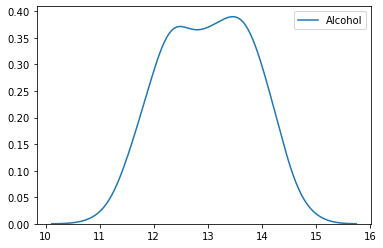

In [ ]:
sns.kdeplot(df['Alcohol'])

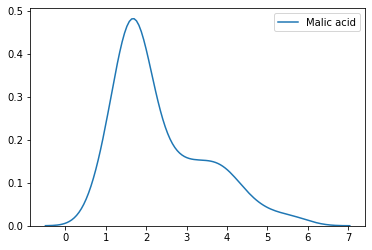

In [ ]:
sns.kdeplot(df['Malic acid'])

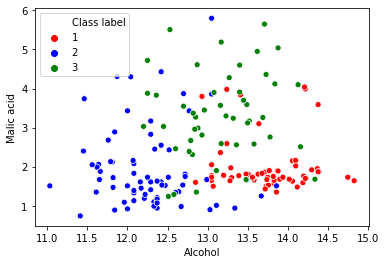

In [ ]:
color_dict={1:'red',3:'green',2:'blue'}
sns.scatterplot(df['Alcohol'],df['Malic acid'],hue=df['Class label'],palette=color_dict)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class label', axis=1),
                                                    df['Class label'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((124, 2), (54, 2))

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [ ]:
np.round(X_train.describe(), 1)

,Alcohol,Malic acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [ ]:
np.round(X_train_scaled.describe(), 1)

,Alcohol,Malic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


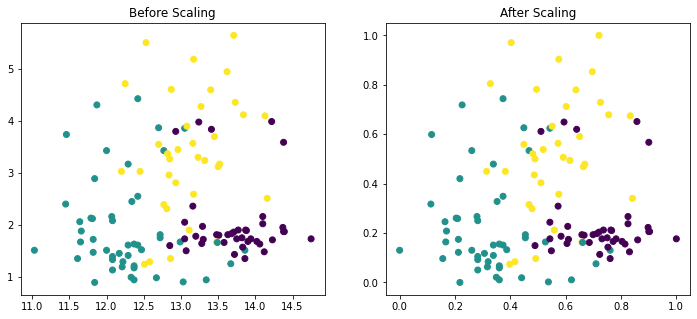

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Alcohol'], X_train['Malic acid'],c=y_train)
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Alcohol'], X_train_scaled['Malic acid'],c=y_train)
ax2.set_title("After Scaling")
plt.show()

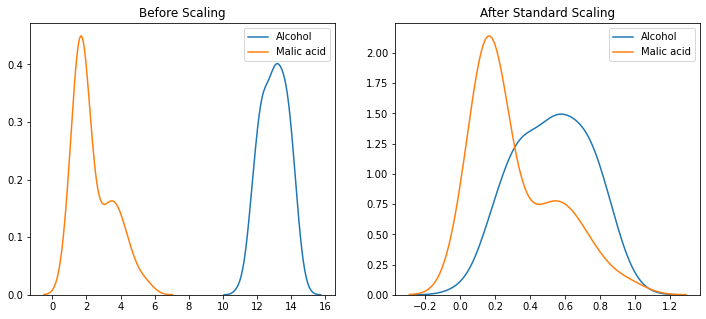

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)
sns.kdeplot(X_train['Malic acid'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
sns.kdeplot(X_train_scaled['Malic acid'], ax=ax2)
plt.show()

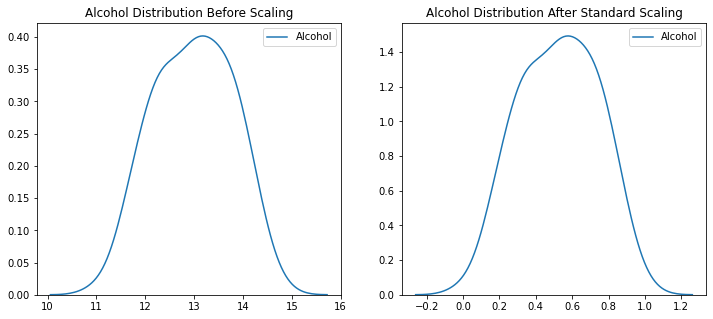

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Alcohol Distribution Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)

# after scaling
ax2.set_title('Alcohol Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
plt.show()

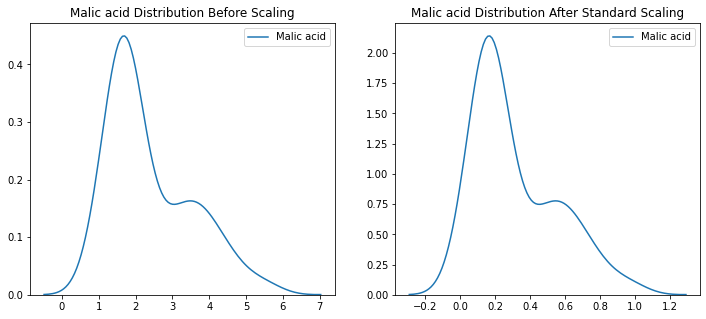

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Malic acid Distribution Before Scaling')
sns.kdeplot(X_train['Malic acid'], ax=ax1)

# after scaling
ax2.set_title('Malic acid Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Malic acid'], ax=ax2)
plt.show()

### Robust Scaling

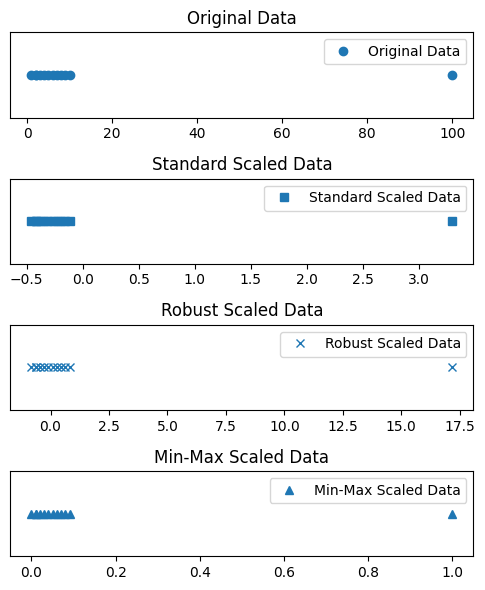

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler

# Generating a simple dataset with an outlier
data = np.array([1, 2, 2, 3, 4, 5, 6, 7, 8, 9, 10, 100]).reshape(-1, 1)

# Applying StandardScaler
standard_scaler = StandardScaler()
data_standard_scaled = standard_scaler.fit_transform(data)

# Applying RobustScaler
robust_scaler = RobustScaler()
data_robust_scaled = robust_scaler.fit_transform(data)

# Applying MinMaxScaler
minmax_scaler = MinMaxScaler()
data_minmax_scaled = minmax_scaler.fit_transform(data)

# Plotting
fig, axs = plt.subplots(4, 1, figsize=(5, 6))

# Original Data
axs[0].plot(data, np.zeros_like(data), 'o', label='Original Data')
axs[0].set_yticks([])
axs[0].set_title("Original Data")
axs[0].legend()

# Standard Scaled Data
axs[1].plot(data_standard_scaled, np.zeros_like(data_standard_scaled), 's', label='Standard Scaled Data')
axs[1].set_yticks([])
axs[1].set_title("Standard Scaled Data")
axs[1].legend()

# Robust Scaled Data
axs[2].plot(data_robust_scaled, np.zeros_like(data_robust_scaled), 'x', label='Robust Scaled Data')
axs[2].set_yticks([])
axs[2].set_title("Robust Scaled Data")
axs[2].legend()

# Min-Max Scaled Data
axs[3].plot(data_minmax_scaled, np.zeros_like(data_minmax_scaled), '^', label='Min-Max Scaled Data')
axs[3].set_yticks([])
axs[3].set_title("Min-Max Scaled Data")
axs[3].legend()

plt.tight_layout()
plt.show()


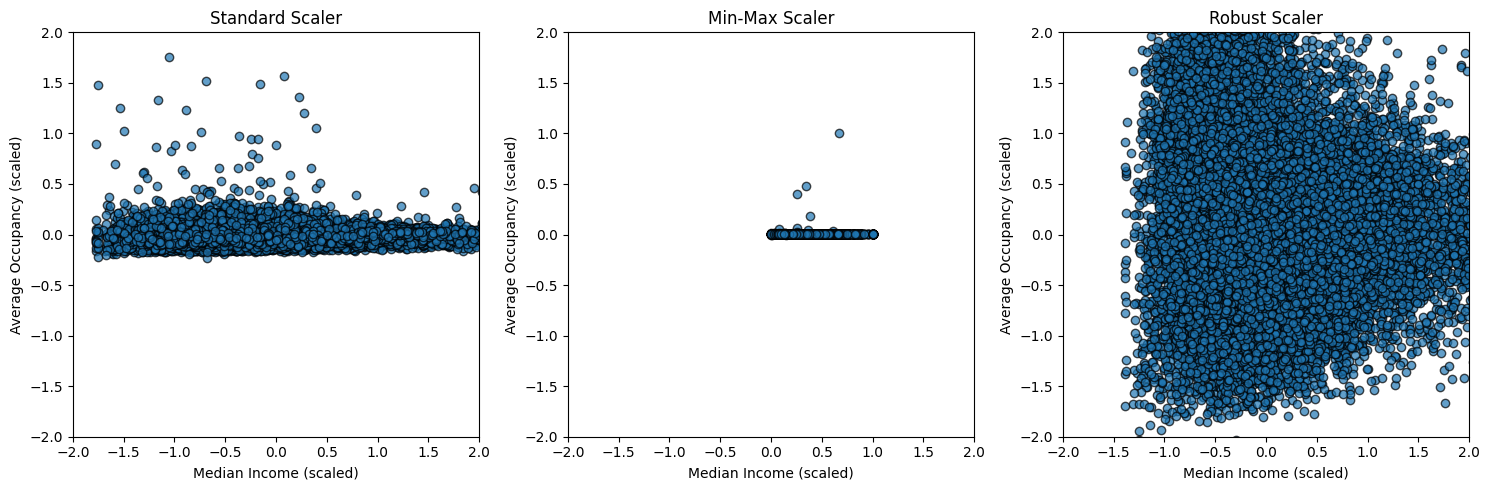

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# Fetching the California housing dataset
dataset = fetch_california_housing()
X_full, y_full = dataset.data, dataset.target
feature_names = dataset.feature_names

# Selecting the features "MedInc" and "AveOccup"
features = ["MedInc", "AveOccup"]
features_idx = [feature_names.index(feature) for feature in features]
X = X_full[:, features_idx]

# Scaling the data using Standard Scaler, Min-Max Scaler, and Robust Scaler
scalers = {
    'Standard Scaler': StandardScaler(),
    'Min-Max Scaler': MinMaxScaler(),
    'Robust Scaler': RobustScaler()
}

# Plotting the original and scaled data
plt.figure(figsize=(15, 5))
for i, (name, scaler) in enumerate(scalers.items(), 1):
    X_scaled = scaler.fit_transform(X)

    plt.subplot(1, 3, i)
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], edgecolor='k', alpha=0.7)
    plt.title(f'{name}')
    plt.xlabel('Median Income (scaled)')
    plt.ylabel('Average Occupancy (scaled)')
    plt.xlim(-2, 2)  # Limiting x-axis to exclude outliers
    plt.ylim(-2, 2)  # Limiting y-axis to exclude outliers

plt.tight_layout()
plt.show()


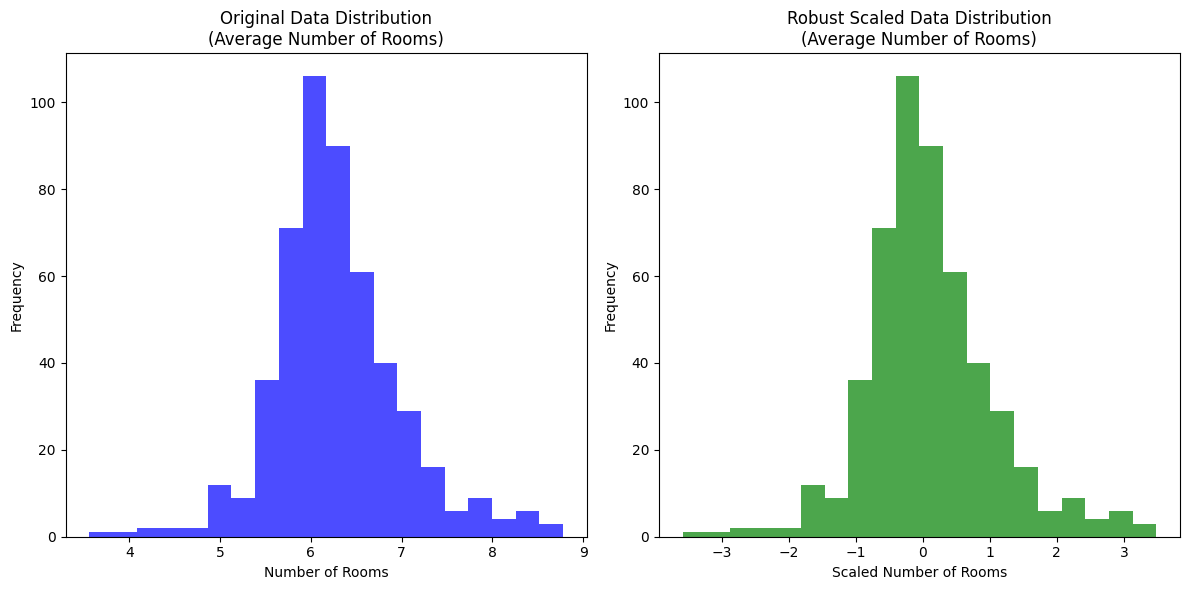

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler

# Load the dataset from the provided URL
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)

# Select a single feature for demonstration, for example, 'rm' (average number of rooms per dwelling)
feature_data = df['rm'].values

# Apply RobustScaler to the selected feature
scaler = RobustScaler()
feature_scaled = scaler.fit_transform(feature_data.reshape(-1, 1)).flatten()

# Plotting the original and scaled data distributions
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(feature_data, bins=20, color='blue', alpha=0.7)
plt.title('Original Data Distribution\n(Average Number of Rooms)')
plt.xlabel('Number of Rooms')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(feature_scaled, bins=20, color='green', alpha=0.7)
plt.title('Robust Scaled Data Distribution\n(Average Number of Rooms)')
plt.xlabel('Scaled Number of Rooms')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


### MaxAbsScaler

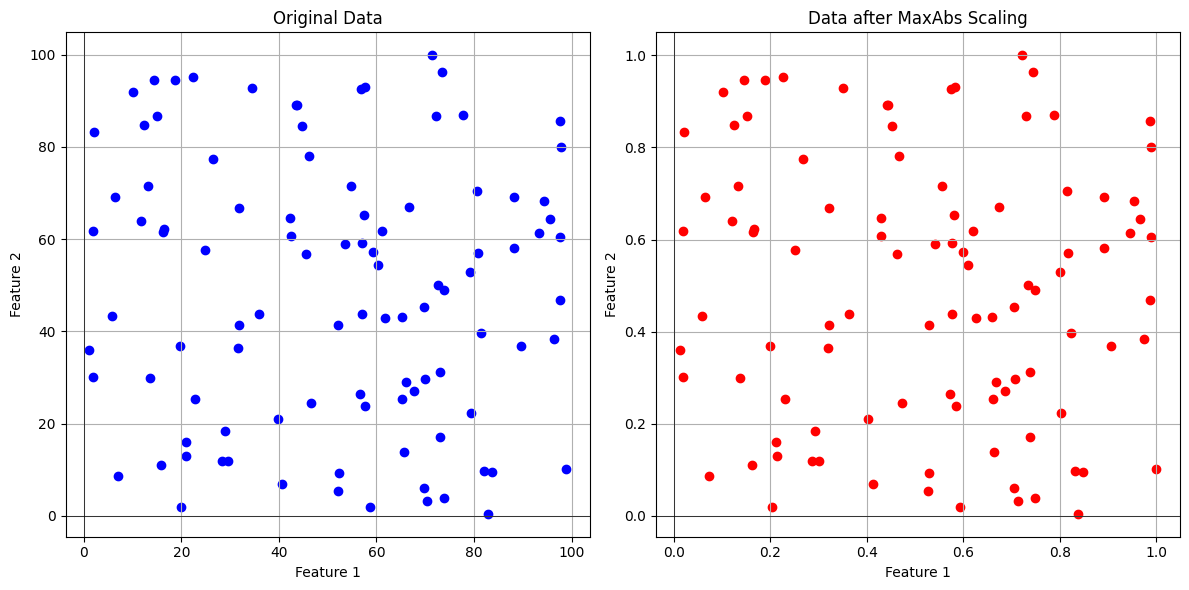

In [ ]:
from sklearn.preprocessing import MaxAbsScaler

# Generating a toy dataset with 100 rows and 2 features
np.random.seed(0)  # For reproducibility
X_toy = np.random.rand(100, 2) * 100  # Random values between 0 and 100

# Applying MaxAbsScaler
max_abs_scaler = MaxAbsScaler()
X_toy_scaled = max_abs_scaler.fit_transform(X_toy)

# Plotting the original and scaled data
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Original Data
ax1.scatter(X_toy[:, 0], X_toy[:, 1], color='blue')
ax1.set_title('Original Data')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax1.axhline(0, color='black', linewidth=0.5)
ax1.axvline(0, color='black', linewidth=0.5)
ax1.grid(True)

# Scaled Data
ax2.scatter(X_toy_scaled[:, 0], X_toy_scaled[:, 1], color='red')
ax2.set_title('Data after MaxAbs Scaling')
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')
ax2.axhline(0, color='black', linewidth=0.5)
ax2.axvline(0, color='black', linewidth=0.5)
ax2.grid(True)

plt.tight_layout()
plt.show()


<ipython-input-7-a4acf9ff69fb>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_toy[:, 0], shade=True, color="blue")
<ipython-input-7-a4acf9ff69fb>:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_toy_scaled[:, 0], shade=True, color="red")


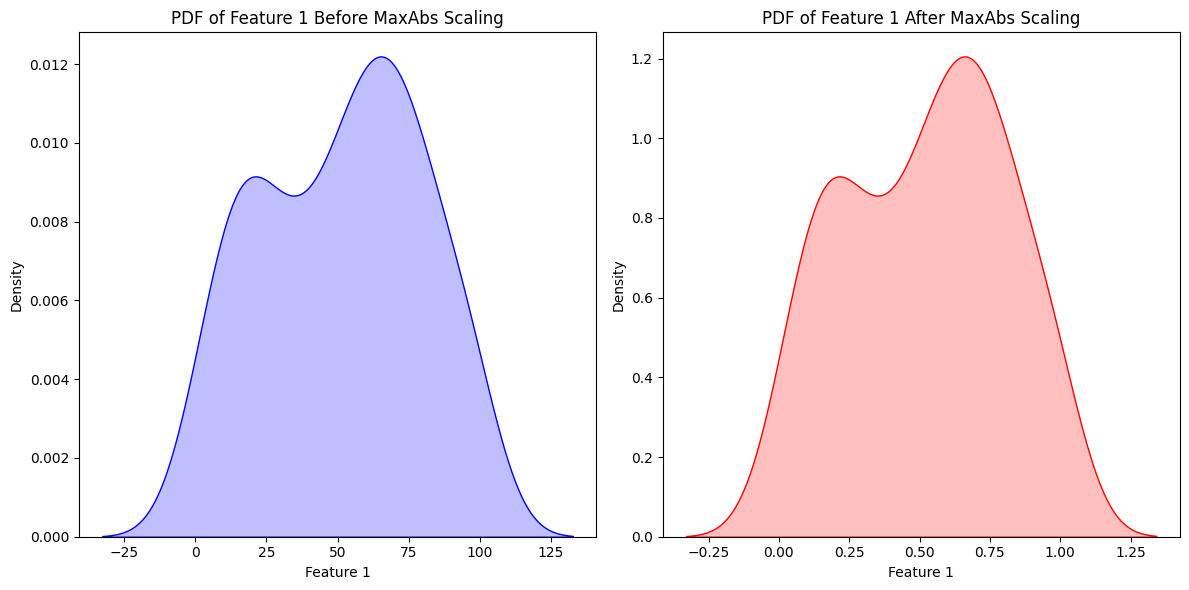

In [ ]:
import seaborn as sns

# Setting up the figure
plt.figure(figsize=(12, 6))

# Plotting the PDF of Feature 1 before scaling
plt.subplot(1, 2, 1)
sns.kdeplot(X_toy[:, 0], shade=True, color="blue")
plt.title('PDF of Feature 1 Before MaxAbs Scaling')
plt.xlabel('Feature 1')
plt.ylabel('Density')

# Plotting the PDF of Feature 1 after scaling
plt.subplot(1, 2, 2)
sns.kdeplot(X_toy_scaled[:, 0], shade=True, color="red")
plt.title('PDF of Feature 1 After MaxAbs Scaling')
plt.xlabel('Feature 1')
plt.ylabel('Density')

plt.tight_layout()
plt.show()


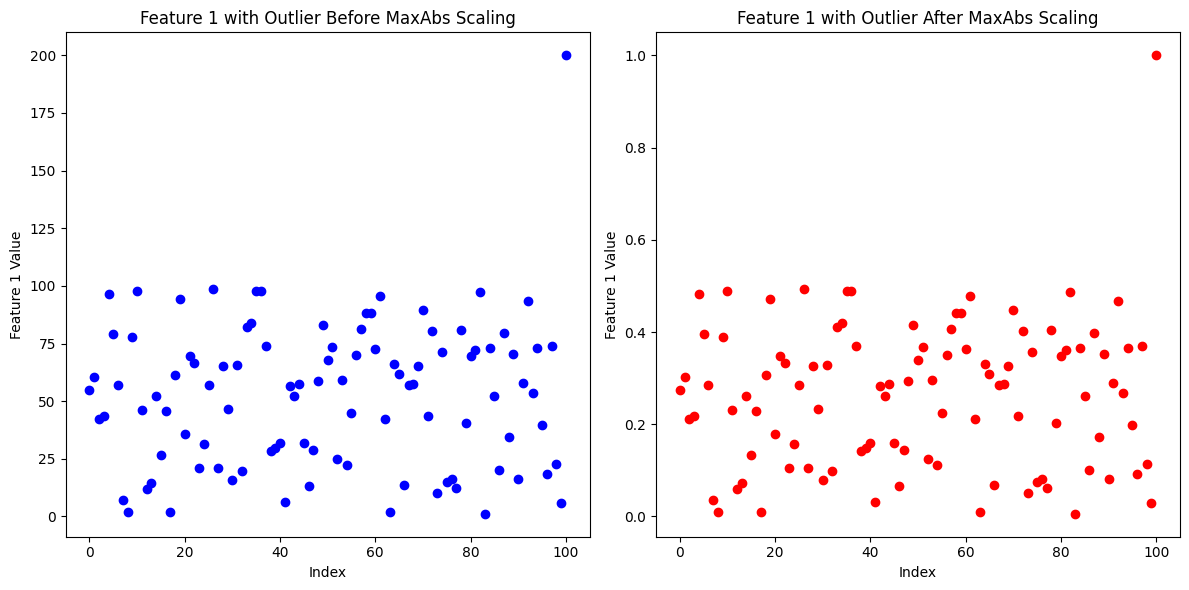

In [ ]:
# Adding a significant outlier to the dataset
X_toy_outlier = np.append(X_toy, [[200, 50]], axis=0)  # Adding an outlier to Feature 1

# Applying MaxAbsScaler to the dataset with the outlier
X_toy_outlier_scaled = max_abs_scaler.fit_transform(X_toy_outlier)

# Setting up the figure for scatter plots with an outlier
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Scatter plot for Feature 1 with outlier before scaling
axes[0].scatter(range(len(X_toy_outlier)), X_toy_outlier[:, 0], color="blue")
axes[0].set_title('Feature 1 with Outlier Before MaxAbs Scaling')
axes[0].set_xlabel('Index')
axes[0].set_ylabel('Feature 1 Value')

# Scatter plot for Feature 1 with outlier after scaling
axes[1].scatter(range(len(X_toy_outlier_scaled)), X_toy_outlier_scaled[:, 0], color="red")
axes[1].set_title('Feature 1 with Outlier After MaxAbs Scaling')
axes[1].set_xlabel('Index')
axes[1].set_ylabel('Feature 1 Value')

plt.tight_layout()
plt.show()


### L1 and L2 Normalization

In [ ]:
import numpy as np
from sklearn.preprocessing import normalize

# Generating a toy dataset with 100 rows and 2 features
np.random.seed(0)  # For reproducibility
X_toy = np.random.rand(100, 2) * 100  # Random values between 0 and 100

# Applying L2 normalization
X_l2_normalized = normalize(X_toy, norm='l2')

# Applying L1 normalization
X_l1_normalized = normalize(X_toy, norm='l1')

# Displaying the first 5 rows of the original and normalized data for comparison
original_data = X_toy[:5]
l2_data = X_l2_normalized[:5]
l1_data = X_l1_normalized[:5]

(original_data, l2_data, l1_data)


(array([[54.88135039, 71.51893664],
        [60.27633761, 54.4883183 ],
        [42.36547993, 64.58941131],
        [43.75872113, 89.17730008],
        [96.36627605, 38.34415188]]),
 array([[0.60878196, 0.79333759],
        [0.74182603, 0.67059238],
        [0.54846349, 0.8361745 ],
        [0.44051722, 0.89774416],
        [0.92914796, 0.36970808]]),
 array([[0.43418691, 0.56581309],
        [0.52521691, 0.47478309],
        [0.39610605, 0.60389395],
        [0.32917129, 0.67082871],
        [0.7153587 , 0.2846413 ]]))

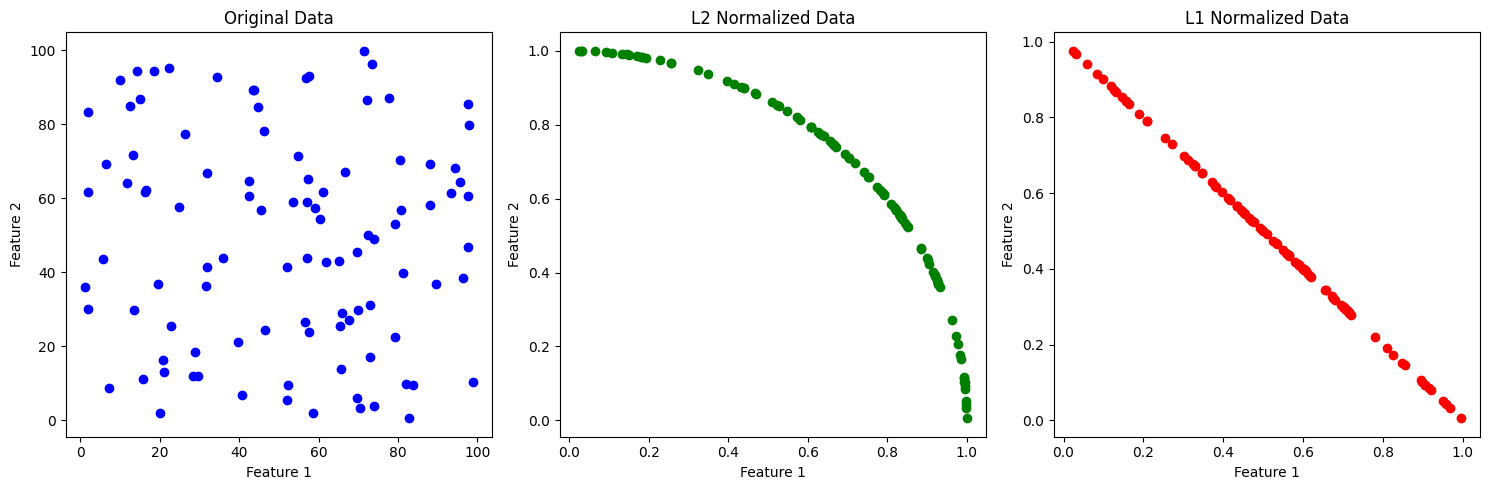

In [ ]:
import matplotlib.pyplot as plt

# Plotting the original, L2 normalized, and L1 normalized data

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Original Data
ax[0].scatter(X_toy[:, 0], X_toy[:, 1], color='blue')
ax[0].set_title('Original Data')
ax[0].set_xlabel('Feature 1')
ax[0].set_ylabel('Feature 2')

# L2 Normalized Data
ax[1].scatter(X_l2_normalized[:, 0], X_l2_normalized[:, 1], color='green')
ax[1].set_title('L2 Normalized Data')
ax[1].set_xlabel('Feature 1')
ax[1].set_ylabel('Feature 2')

# L1 Normalized Data
ax[2].scatter(X_l1_normalized[:, 0], X_l1_normalized[:, 1], color='red')
ax[2].set_title('L1 Normalized Data')
ax[2].set_xlabel('Feature 1')
ax[2].set_ylabel('Feature 2')

plt.tight_layout()
plt.show()


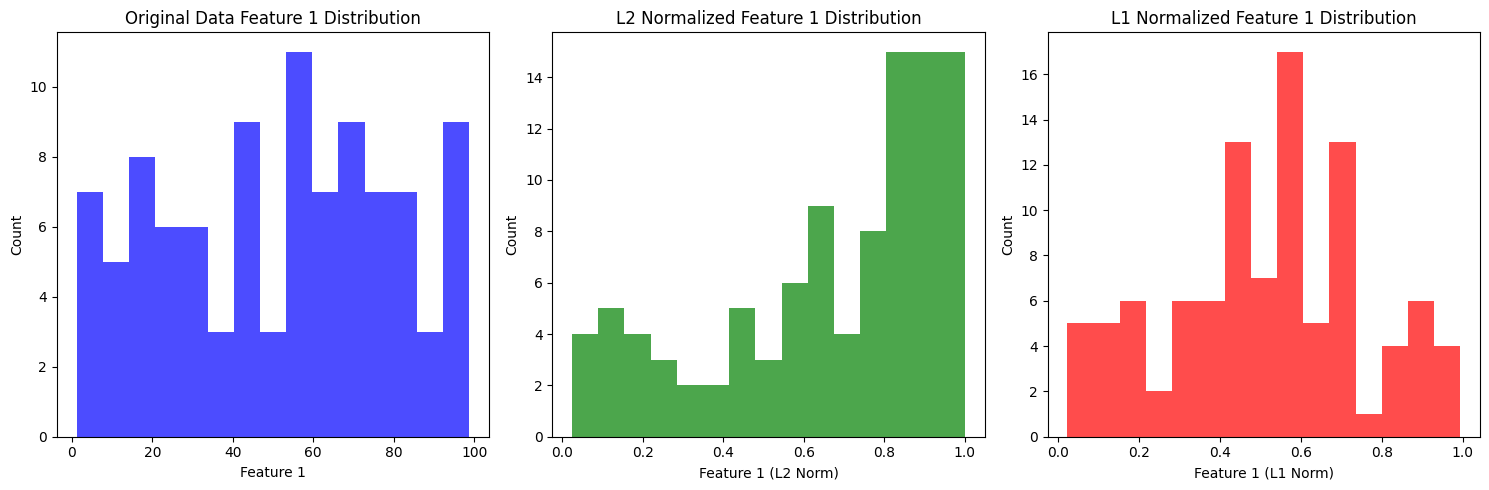

In [ ]:
# Plotting the distribution of Feature 1 before and after L2 and L1 normalization

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Original Data Feature 1 Distribution
ax[0].hist(X_toy[:, 0], bins=15, color='blue', alpha=0.7)
ax[0].set_title('Original Data Feature 1 Distribution')
ax[0].set_xlabel('Feature 1')
ax[0].set_ylabel('Count')

# L2 Normalized Data Feature 1 Distribution
ax[1].hist(X_l2_normalized[:, 0], bins=15, color='green', alpha=0.7)
ax[1].set_title('L2 Normalized Feature 1 Distribution')
ax[1].set_xlabel('Feature 1 (L2 Norm)')
ax[1].set_ylabel('Count')

# L1 Normalized Data Feature 1 Distribution
ax[2].hist(X_l1_normalized[:, 0], bins=15, color='red', alpha=0.7)
ax[2].set_title('L1 Normalized Feature 1 Distribution')
ax[2].set_xlabel('Feature 1 (L1 Norm)')
ax[2].set_ylabel('Count')

plt.tight_layout()
plt.show()


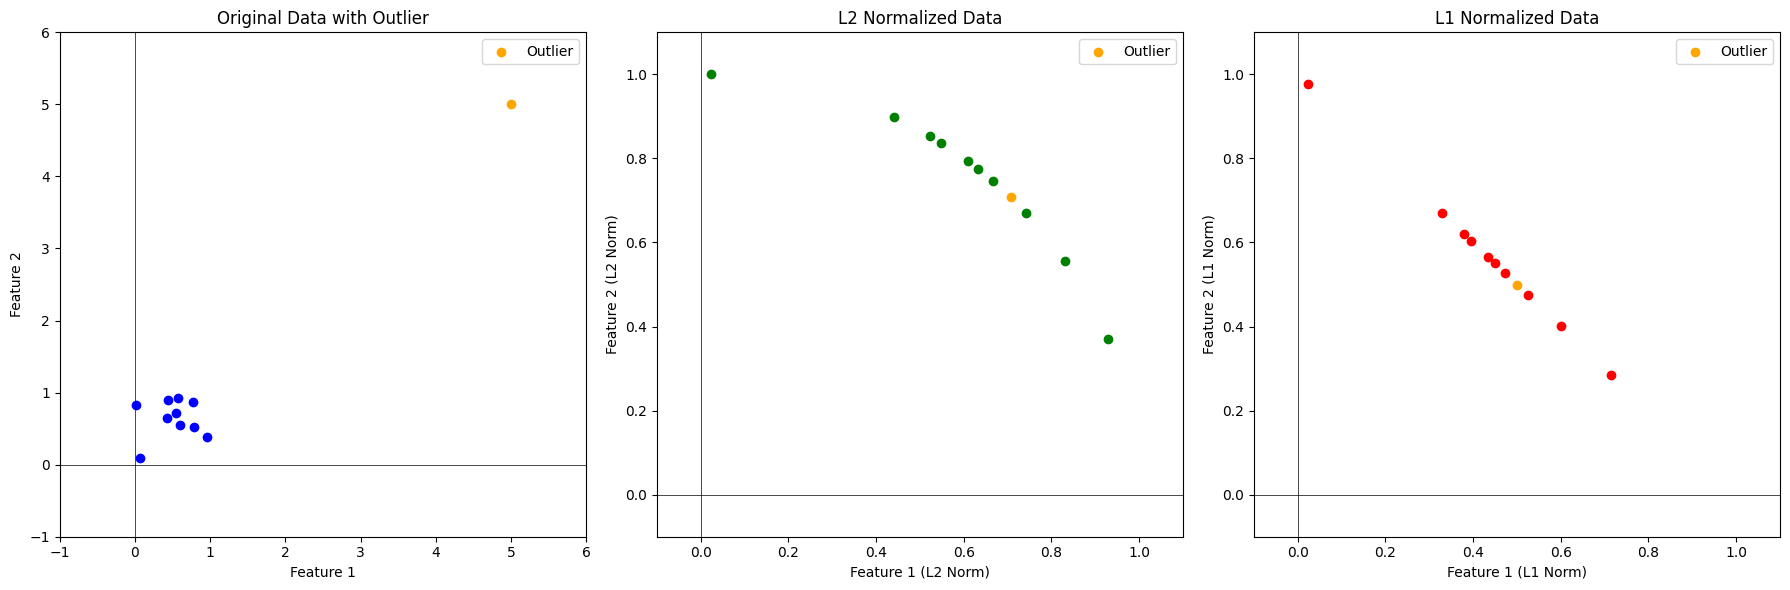

In [ ]:
# Creating a new dataset with multiple points and one significant outlier
np.random.seed(0)  # For reproducibility
X_new = np.random.rand(10, 2)  # 10 random points
X_new = np.vstack([X_new, [5, 5]])  # Adding an outlier

# L2 Normalizing the data with the outlier
X_new_l2_normalized = normalize(X_new, norm='l2')

# L1 Normalizing the data with the outlier
X_new_l1_normalized = normalize(X_new, norm='l1')
# Plotting the original, L2 normalized, and L1 normalized data with the outlier highlighted in a different color
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Original data with highlighted outlier
axes[0].scatter(X_new[:-1, 0], X_new[:-1, 1], color='blue')
axes[0].scatter(X_new[-1, 0], X_new[-1, 1], color='orange', label='Outlier')
axes[0].set_title('Original Data with Outlier')
axes[0].set_xlim(-1, 6)
axes[0].set_ylim(-1, 6)
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')
axes[0].axhline(0, color='black', linewidth=0.5)
axes[0].axvline(0, color='black', linewidth=0.5)
axes[0].legend()

# L2 Normalized data with highlighted outlier
axes[1].scatter(X_new_l2_normalized[:-1, 0], X_new_l2_normalized[:-1, 1], color='green')
axes[1].scatter(X_new_l2_normalized[-1, 0], X_new_l2_normalized[-1, 1], color='orange', label='Outlier')
axes[1].set_title('L2 Normalized Data')
axes[1].set_xlim(-0.1, 1.1)
axes[1].set_ylim(-0.1, 1.1)
axes[1].set_xlabel('Feature 1 (L2 Norm)')
axes[1].set_ylabel('Feature 2 (L2 Norm)')
axes[1].axhline(0, color='black', linewidth=0.5)
axes[1].axvline(0, color='black', linewidth=0.5)
axes[1].legend()

# L1 Normalized data with highlighted outlier
axes[2].scatter(X_new_l1_normalized[:-1, 0], X_new_l1_normalized[:-1, 1], color='red')
axes[2].scatter(X_new_l1_normalized[-1, 0], X_new_l1_normalized[-1, 1], color='orange', label='Outlier')
axes[2].set_title('L1 Normalized Data')
axes[2].set_xlim(-0.1, 1.1)
axes[2].set_ylim(-0.1, 1.1)
axes[2].set_xlabel('Feature 1 (L1 Norm)')
axes[2].set_ylabel('Feature 2 (L1 Norm)')
axes[2].axhline(0, color='black', linewidth=0.5)
axes[2].axvline(0, color='black', linewidth=0.5)
axes[2].legend()

plt.tight_layout()
plt.show()
